<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/Assignment-2/C1%EC%84%B1%EB%AF%BC%EC%A7%80_%EC%A2%85%ED%95%A9%EC%8B%A4%EC%8A%B5-2_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [50]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# from scipy.stats import skew, kurtosis


import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


In [3]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,436 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:
matplotlib.rc("font",family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [117]:
df_raw = pd.read_excel('/content/mydrive/MyDrive/1. 실습데이터 설명(Data Dictionary).xlsx', sheet_name = 'SCALE불량')

print(df_raw.shape)
df_raw.head()

(720, 21)


,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707.0,15109.0,14180.0,1호기,...,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,적용,8.0,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707.0,15109.0,14180.0,1호기,...,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,적용,8.0,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619.0,19181.0,18130.0,2호기,...,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,적용,8.0,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619.0,19181.0,18130.0,2호기,...,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,적용,8.0,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098.0,13334.0,12430.0,3호기,...,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,적용,8.0,1조


In [67]:
df_raw['FUR_NO_ROW'] = df_raw['FUR_NO_ROW'].astype('object')

In [68]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    float64
 7   PT_LTH             720 non-null    float64
 8   PT_WGT             720 non-null    float64
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    object 
 11  FUR_HZ_TEMP        720 non-null    float64
 12  FUR_HZ_TIME        720 non-null    float64
 13  FUR_SZ_TEMP        720 non-null    float64
 14  FUR_SZ_TIME        720 non-null    float64
 15  FUR_TIME           720 non-null    float64
 16  FUR_EXTEMP         720 non

**결측치 확인하기**

In [69]:
df_raw.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

데이터셋에 결측치는 없는 것으로 보인다.

**이상치 처리하기**

In [70]:
# 연속형 변수와 범주형 변수 나누기

df_raw_num = df_raw[['PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT',
                    'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME',
                    'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'ROLLING_DESCALING']]

df_raw_cat = df_raw[['STEEL_KIND', 'FUR_NO', 'FUR_NO_ROW', 'HSB', 'WORK_GR']]                    

In [71]:
print(df_raw_num.shape)
df_raw_num.head()

(720, 12)


,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707.0,15109.0,14180.0,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,8.0
1,32.25,3707.0,15109.0,14180.0,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,8.0
2,33.27,3619.0,19181.0,18130.0,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,8.0
3,33.27,3619.0,19181.0,18130.0,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,8.0
4,38.33,3098.0,13334.0,12430.0,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,8.0


In [72]:
print(df_raw_cat.shape)
df_raw_cat.head()

(720, 5)


,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,T1,1호기,1.0,적용,2조
1,T1,1호기,2.0,적용,2조
2,T8,2호기,1.0,적용,3조
3,T8,2호기,2.0,적용,3조
4,T8,3호기,1.0,적용,1조


In [73]:
# 각 변수의 이상치가 가지는 인덱스값 반환


def outlier_idx_detection(data) :

    outlier_indices = []
    for col in data.columns :
        q1, q3 = np.percentile(data[col], [25, 75])
        IQR = q3 - q1
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR

        outlier_idx = data[(data[col] < lower) | (data[col] > upper)].index
        outlier_indices.append(list(outlier_idx))

    outlier_index = []
    for lst in outlier_indices :
        for i in range(len(lst)) :
            outlier_index.append(lst[i])

    return list(set(outlier_index))

In [74]:
outliers = outlier_idx_detection(df_raw_num)

print(len(outliers))
outliers

118


[512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 521,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 572,
 573,
 574,
 575,
 576,
 85,
 86,
 87,
 88,
 89,
 106,
 640,
 641,
 157,
 184,
 185,
 41,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 351,
 354,
 355,
 357,
 437,
 438,
 442,
 444,
 447,
 448,
 449,
 450,
 454,
 456,
 460,
 461,
 463,
 469,
 473,
 475,
 481,
 489,
 492,
 493,
 494,
 495,
 496,
 500,
 501,
 505,
 506,
 507,
 508,
 509,
 510,
 511]

In [75]:
df_raw_num.drop(outliers, axis = 0, inplace = True)
df_raw_cat.drop(outliers, axis = 0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [76]:
print(df_raw_num.shape)
df_raw_num.head()

(602, 12)


,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707.0,15109.0,14180.0,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,8.0
1,32.25,3707.0,15109.0,14180.0,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,8.0
2,33.27,3619.0,19181.0,18130.0,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,8.0
3,33.27,3619.0,19181.0,18130.0,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,8.0
4,38.33,3098.0,13334.0,12430.0,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,8.0


In [77]:
print(df_raw_cat.shape)
df_raw_cat.head()

(602, 5)


,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,T1,1호기,1.0,적용,2조
1,T1,1호기,2.0,적용,2조
2,T8,2호기,1.0,적용,3조
3,T8,2호기,2.0,적용,3조
4,T8,3호기,1.0,적용,1조


## **데이터 가공하기**

### **연속형 변수의 분포 확인하기**

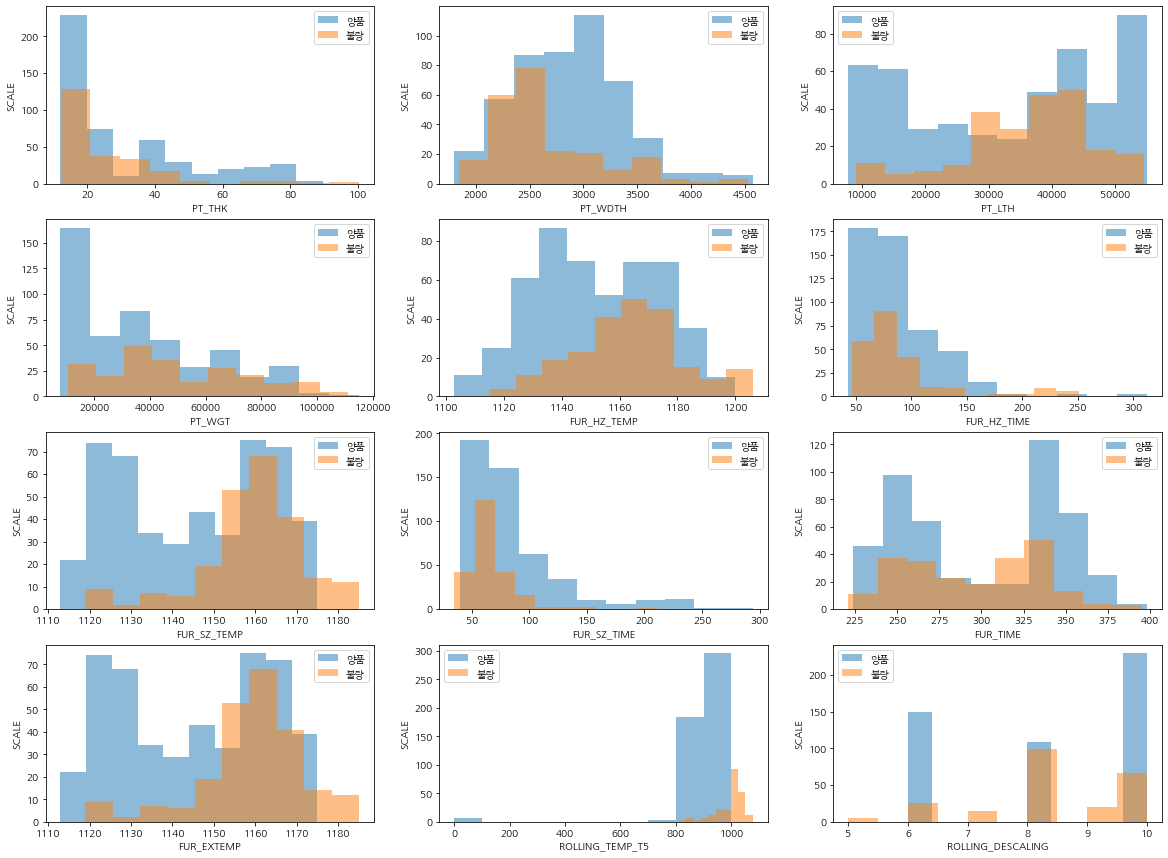

In [15]:
num = 0
fig = plt.figure(figsize = (20, 15))


for col in df_raw_num.columns:
    plt.subplot(4, 3, num+1)
    num += 1
    plt.hist(df_raw[df_raw["SCALE"] == '양품'][col], label = "양품", alpha = 0.5)
    plt.hist(df_raw[df_raw["SCALE"] == '불량'][col], label = "불량", alpha = 0.5)
    plt.xlabel(col)
    plt.ylabel("SCALE")
    plt.legend()
plt.show()

- PT_THK, PT_WDTH, PT_LTH, FUR_HZ_TEMP, FUR_HZ_TIME, FUR_SZ_TEMP, FUR_SZ_TIME, FUR_EXTEMP에 따라 scale의 불량 여부가 영향을 받는다.
- 후판 지시두께가 두꺼울수록, 후판 지시폭이 넓을수록, 후판 지시길이가 길수록, 가열로 가열대 소재온도가 높을수록, 가열로 가열대 재로시간이 짧을수록, 가열로 균열대 소재온도가 높을수록, 가열로 균열대 재로시간이 짧을수록, 가열로 추출온도가 높을수록 불량률이 커진다.

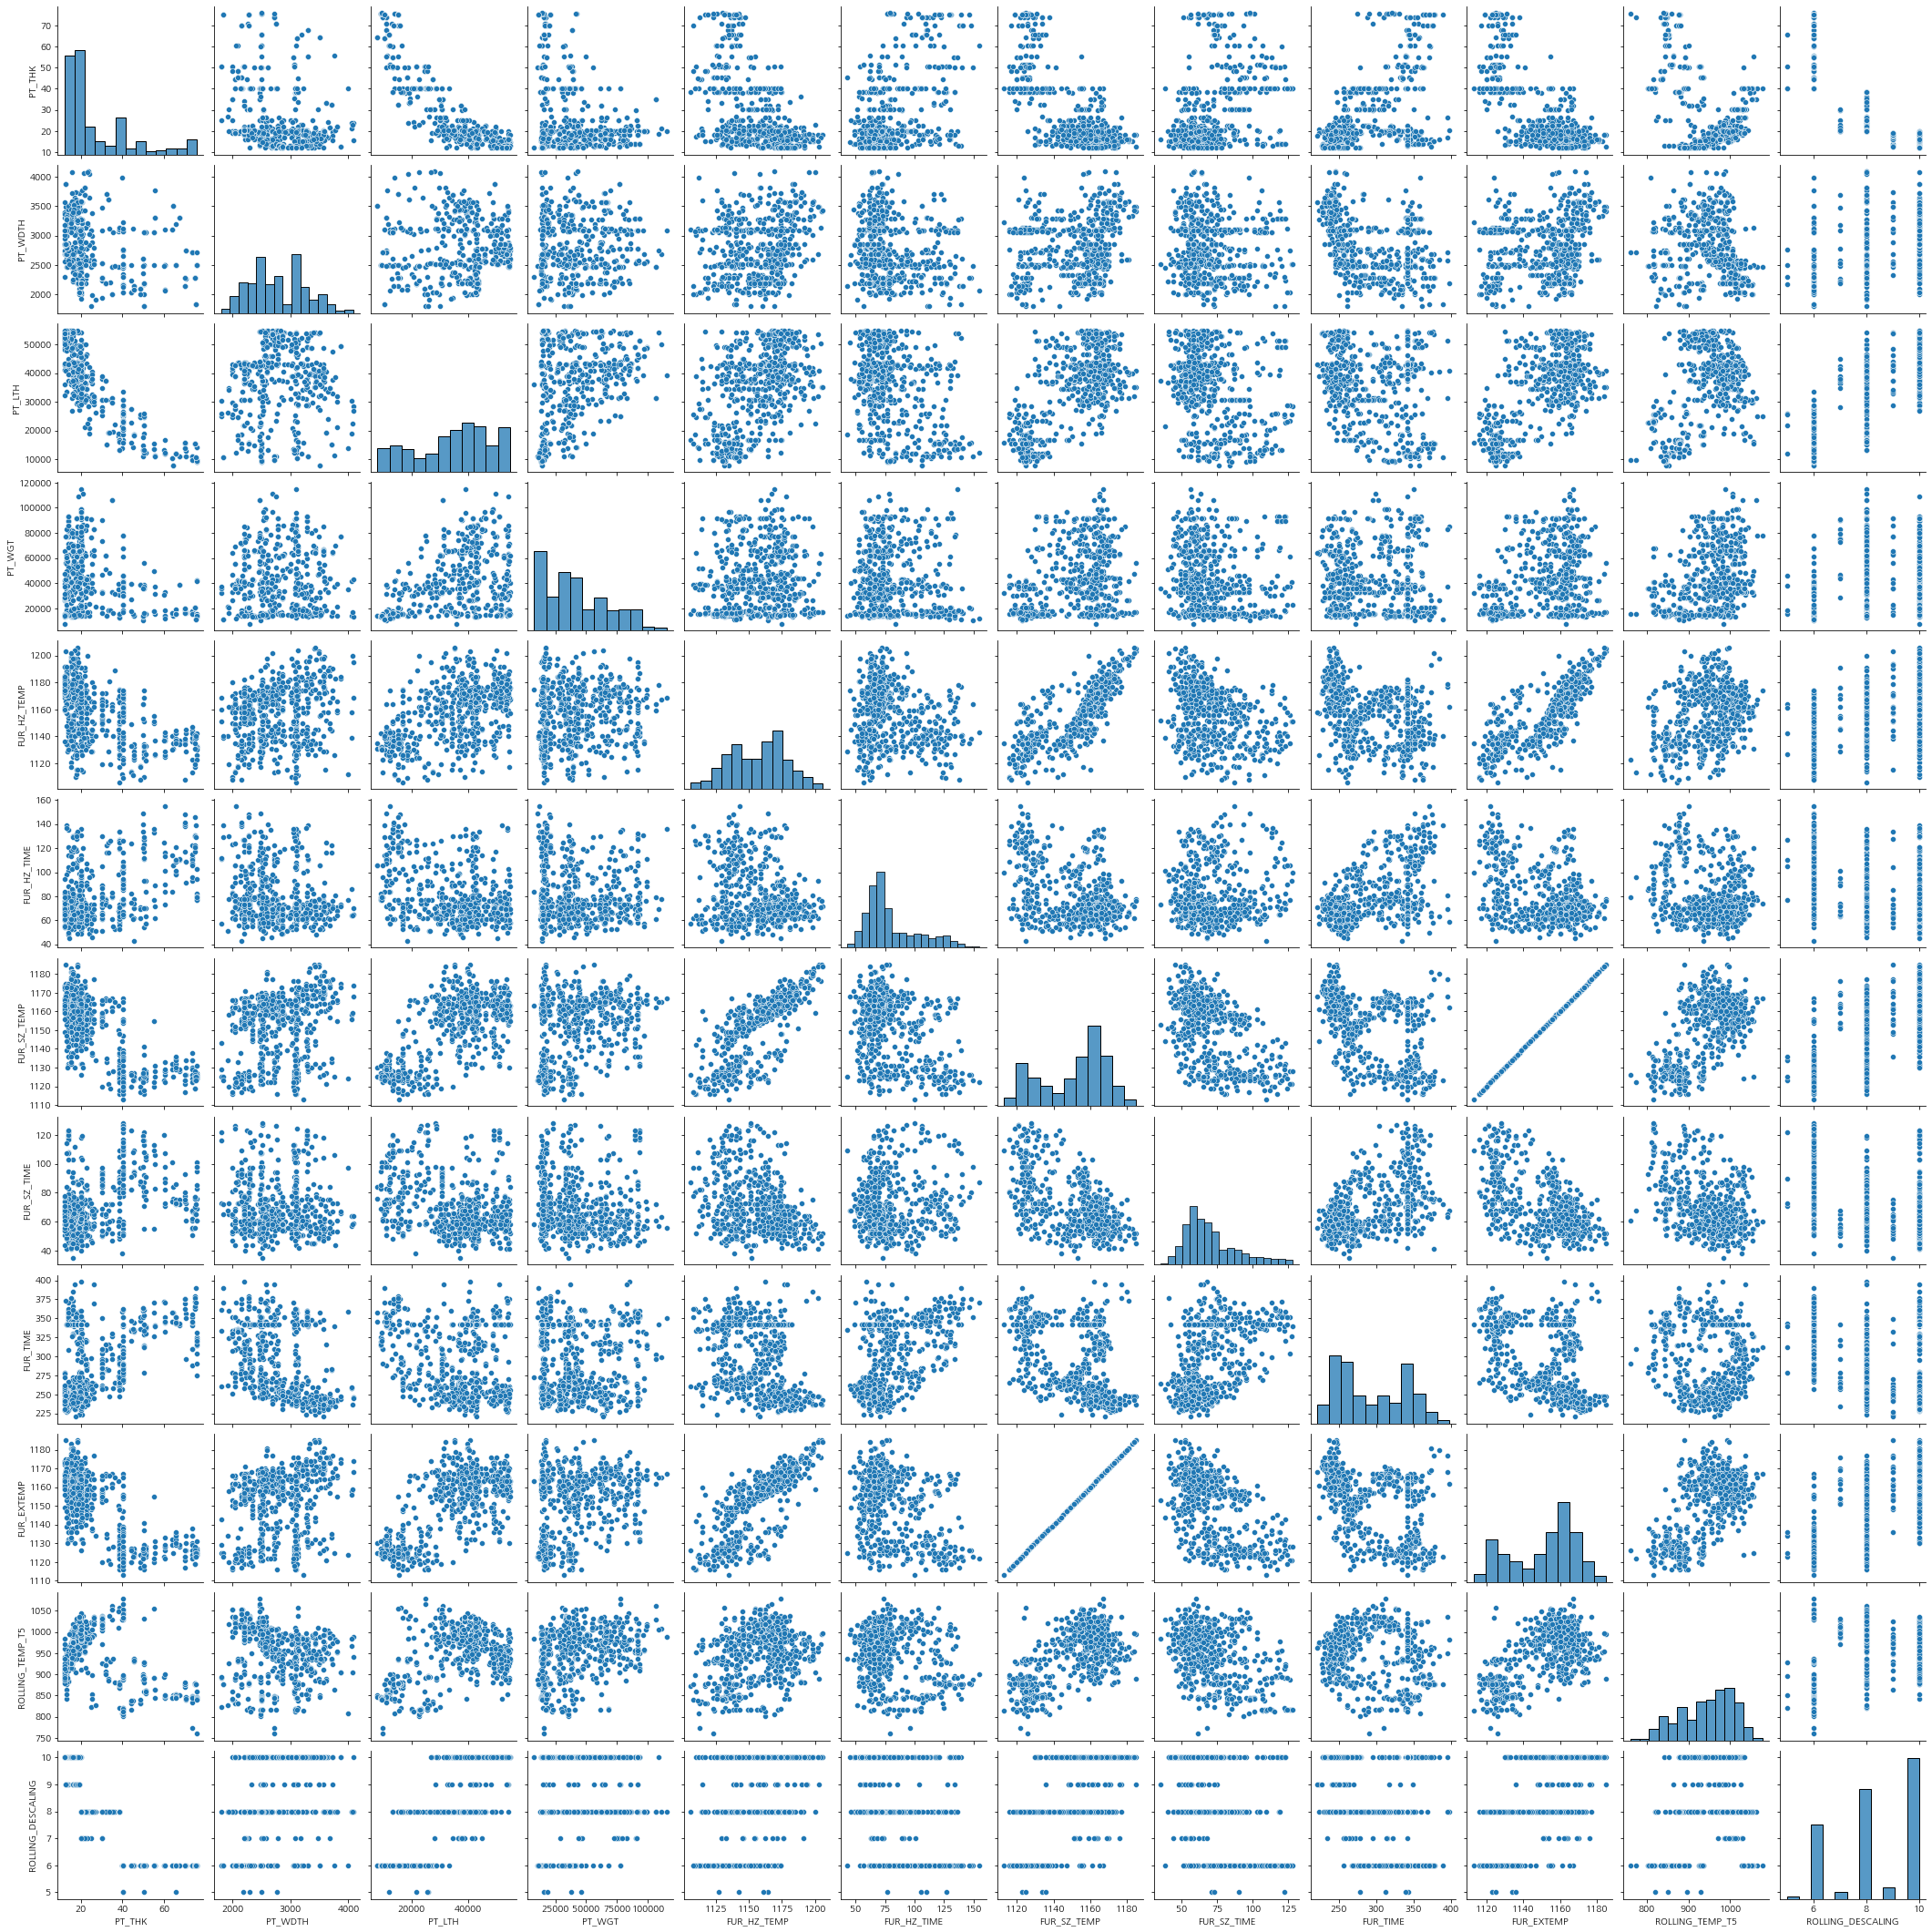

In [16]:
sns.pairplot(df_raw_num)

### **범주형 변수의 분포 확인하기**

In [23]:
print(df_raw_cat.shape)
df_raw_cat.head()

(602, 5)


,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,T1,1호기,1.0,적용,2조
1,T1,1호기,2.0,적용,2조
2,T8,2호기,1.0,적용,3조
3,T8,2호기,2.0,적용,3조
4,T8,3호기,1.0,적용,1조


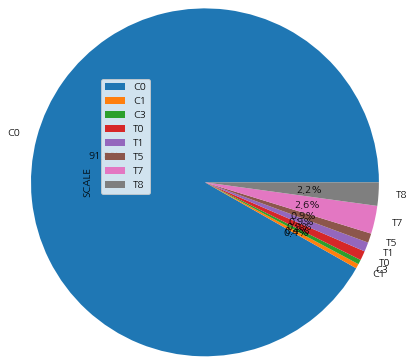

In [24]:
ds_sub = df_raw[df_raw["SCALE"] == '불량']
ds_count = ds_sub.groupby("STEEL_KIND", as_index = False).agg("count")
ds_count.plot.pie(y = "SCALE", labels = ds_count["STEEL_KIND"], autopct= "%.1f%%", radius = 2)

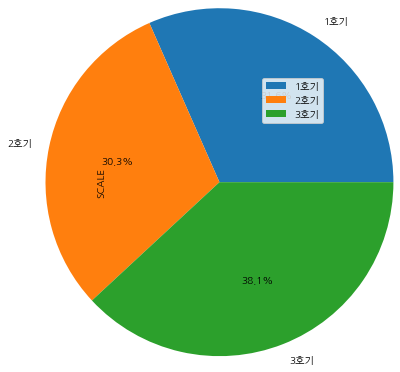

In [25]:
ds_sub = df_raw[df_raw["SCALE"] == '불량']
ds_count = ds_sub.groupby("FUR_NO", as_index = False).agg("count")
ds_count.plot.pie(y = "SCALE", labels = ds_count["FUR_NO"], autopct= "%.1f%%", radius = 2)

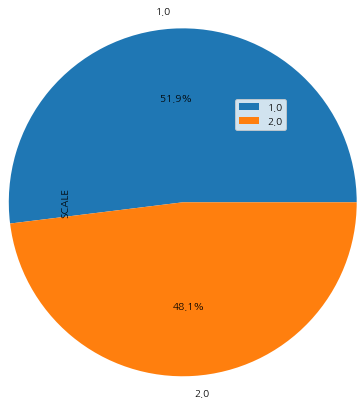

In [26]:
ds_sub = df_raw[df_raw["SCALE"] == '불량']
ds_count = ds_sub.groupby("FUR_NO_ROW", as_index = False).agg("count")
ds_count.plot.pie(y = "SCALE", labels = ds_count["FUR_NO_ROW"], autopct= "%.1f%%", radius = 2)

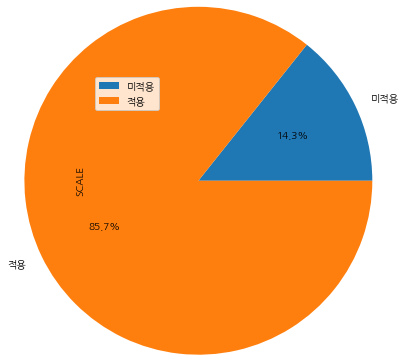

In [27]:
ds_sub = df_raw[df_raw["SCALE"] == '불량']
ds_count = ds_sub.groupby("HSB", as_index = False).agg("count")
ds_count.plot.pie(y = "SCALE", labels = ds_count["HSB"], autopct= "%.1f%%", radius = 2)

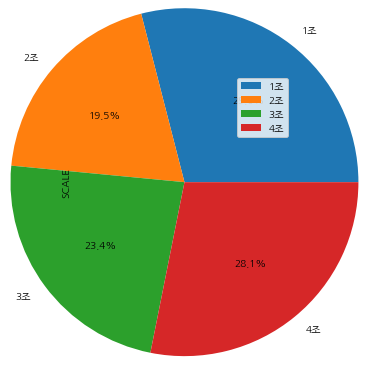

In [28]:
ds_sub = df_raw[df_raw["SCALE"] == '불량']
ds_count = ds_sub.groupby("WORK_GR", as_index = False).agg("count")
ds_count.plot.pie(y = "SCALE", labels = ds_count["WORK_GR"], autopct= "%.1f%%", radius = 2)

범주형 변수의 파이 차트를 해석한 결과는 다음과 같다 :

- 후판강종이 C0일 때 불량률이 크다.
- 가열로 호기에 따른 불량여부의 차이는 없다.
- 가열로 장입열 구분에 따른 불량여부의 차이는 없다.
- HSB를 적용하지 않은 경우 불량률이 크다.
- 작업조에 따른 불량여부의 차이는 없다.

In [29]:
df_raw_cat['STEEL_KIND'].value_counts()

C0    427
T8     84
T5     27
T7     22
T1     18
T0     14
C3      7
T3      2
C1      1
Name: STEEL_KIND, dtype: int64

In [32]:
df_raw_cat['FUR_NO'].value_counts()

3호기    206
1호기    201
2호기    195
Name: FUR_NO, dtype: int64

In [33]:
df_raw_cat['FUR_NO_ROW'].value_counts()

1.0    305
2.0    297
Name: FUR_NO_ROW, dtype: int64

In [ ]:
df_raw_cat.loc[df_raw_cat['HSB'] == '적용', 'HSB'] = '1'
df_raw_cat.loc[df_raw_cat['HSB'] == '미적용', 'HSB'] = '0'

In [34]:
df_raw_cat['HSB'].value_counts()

적용     577
미적용     25
Name: HSB, dtype: int64

In [35]:
df_raw_cat['WORK_GR'].value_counts()

4조    168
1조    156
2조    139
3조    139
Name: WORK_GR, dtype: int64

**<결론>**

EDA를 통해 확인한 결과는 다음과 같다.

| 연속형 변수  | 범주형 변수 |
|:-----------:|:-----------:|
|PT_THK | STEEL_KIND = 'C0' |
|PT_WDTH | HSB |
|PT_LTH | |
|FUR_HZ_TEMP | |
|FUR_HZ_TIME | |
|FUR_SZ_TEMP | |
|FUR_SZ_TIME | |
|FUR_EXTEMP | |

- 연속형 변수
    - PT_THK, PT_WDTH, PT_LTH, FUR_HZ_TEMP, FUR_SZ_TEMP, 그리고 FUR_EXTEMP가 클수록 불량률 또한 커진다.
    - FUR_HZ_TIME과 FUR_SZ_TIME이 작을수록 불량률이 커진다.

- 범주형 변수
    - STEEL_KIND = 'C', HSB = '미적용'일 때 불량률이 크다.

### **데이터셋 확정하기**

In [36]:
print(df_raw_num.shape)
df_raw_num.head()

(602, 12)


,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707.0,15109.0,14180.0,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,8.0
1,32.25,3707.0,15109.0,14180.0,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,8.0
2,33.27,3619.0,19181.0,18130.0,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,8.0
3,33.27,3619.0,19181.0,18130.0,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,8.0
4,38.33,3098.0,13334.0,12430.0,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,8.0


In [37]:
print(df_raw_cat.shape)
df_raw_cat.head()

(602, 5)


,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,WORK_GR
0,T,1호기,1.0,적용,2조
1,T,1호기,2.0,적용,2조
2,T,2호기,1.0,적용,3조
3,T,2호기,2.0,적용,3조
4,T,3호기,1.0,적용,1조


In [38]:
df_raw_num_vital = df_raw_num[['PT_THK', 'PT_WDTH', 'PT_LTH', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_EXTEMP']]
df_raw_cat_vital = df_raw_cat[['STEEL_KIND', 'HSB']]

In [39]:
df_raw_y = df_raw['SCALE'].drop(outliers, axis = 0)

In [40]:
print(df_raw_y.shape)
df_raw_y.head()

(602,)


0    양품
1    양품
2    양품
3    양품
4    양품
Name: SCALE, dtype: object

In [41]:
df_raw_vital = df_raw_num_vital.join(df_raw_cat_vital, how='left')

print(df_raw_vital.shape)
df_raw_vital.head()

(602, 10)


,PT_THK,PT_WDTH,PT_LTH,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,STEEL_KIND,HSB
0,32.25,3707.0,15109.0,1144.0,116.0,1133.0,59.0,1133.0,T,적용
1,32.25,3707.0,15109.0,1144.0,122.0,1135.0,53.0,1135.0,T,적용
2,33.27,3619.0,19181.0,1129.0,116.0,1121.0,55.0,1121.0,T,적용
3,33.27,3619.0,19181.0,1152.0,125.0,1127.0,68.0,1127.0,T,적용
4,38.33,3098.0,13334.0,1140.0,134.0,1128.0,48.0,1128.0,T,적용


In [42]:
df_raw_vital_dummy = pd.get_dummies(df_raw_vital)

In [43]:
print(df_raw_vital_dummy.shape)
df_raw_vital_dummy.head()

(602, 12)


,PT_THK,PT_WDTH,PT_LTH,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,STEEL_KIND_C,STEEL_KIND_T,HSB_미적용,HSB_적용
0,32.25,3707.0,15109.0,1144.0,116.0,1133.0,59.0,1133.0,0,1,0,1
1,32.25,3707.0,15109.0,1144.0,122.0,1135.0,53.0,1135.0,0,1,0,1
2,33.27,3619.0,19181.0,1129.0,116.0,1121.0,55.0,1121.0,0,1,0,1
3,33.27,3619.0,19181.0,1152.0,125.0,1127.0,68.0,1127.0,0,1,0,1
4,38.33,3098.0,13334.0,1140.0,134.0,1128.0,48.0,1128.0,0,1,0,1


In [44]:
df_raw_y[df_raw_y == '불량'] = 1
df_raw_y[df_raw_y == '양품'] = 0

In [45]:
print(df_raw_y.shape)
df_raw_y.value_counts()

(602,)


0    405
1    197
Name: SCALE, dtype: int64

In [46]:
print(df_raw_vital_dummy.shape)
df_raw_vital_dummy.head()

(602, 12)


,PT_THK,PT_WDTH,PT_LTH,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,STEEL_KIND_C,STEEL_KIND_T,HSB_미적용,HSB_적용
0,32.25,3707.0,15109.0,1144.0,116.0,1133.0,59.0,1133.0,0,1,0,1
1,32.25,3707.0,15109.0,1144.0,122.0,1135.0,53.0,1135.0,0,1,0,1
2,33.27,3619.0,19181.0,1129.0,116.0,1121.0,55.0,1121.0,0,1,0,1
3,33.27,3619.0,19181.0,1152.0,125.0,1127.0,68.0,1127.0,0,1,0,1
4,38.33,3098.0,13334.0,1140.0,134.0,1128.0,48.0,1128.0,0,1,0,1


In [57]:
df_raw_y = df_raw_y.astype(int)

print(df_raw_y.shape)
df_raw_y.head()

(602,)


0    0
1    0
2    0
3    0
4    0
Name: SCALE, dtype: int64

In [59]:
df_raw_y.value_counts()

0    405
1    197
Name: SCALE, dtype: int64

In [48]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_vital_dummy, 
                                                                df_raw_y, 
                                                                test_size = 0.3, 
                                                                random_state = 1234)

print('df_train_x size : {}'.format(df_train_x.shape))
print('df_test_x size : {}'.format(df_test_x.shape))
print('df_train_y size : {}'.format(df_train_y.shape))
print('df_test_y size : {}'.format(df_test_y.shape))

df_train_x size : (421, 12)
df_test_x size : (181, 12)
df_train_y size : (421,)
df_test_y size : (181,)


## **의사결정나무 (Decision Tree)**

### **모델 생성하기**

In [104]:
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T,32.25,3707.0,15109.0,14180.0,1,...,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,적용,8.0,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T,32.25,3707.0,15109.0,14180.0,1,...,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,적용,8.0,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T,33.27,3619.0,19181.0,18130.0,1,...,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,적용,8.0,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T,33.27,3619.0,19181.0,18130.0,1,...,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,적용,8.0,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T,38.33,3098.0,13334.0,12430.0,1,...,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,적용,8.0,1조


In [83]:
df_raw.columns

Index(['PLATE_NO', 'ROLLING_DATE', 'SCALE', 'SPEC', 'STEEL_KIND', 'PT_THK',
       'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_NO', 'FUR_NO_ROW', 'FUR_HZ_TEMP',
       'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP',
       'ROLLING_TEMP_T5', 'HSB', 'ROLLING_DESCALING', 'WORK_GR'],
      dtype='object')

In [130]:
df_raw.head()

,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,0,32.25,3707.0,15109.0,14180.0,1,1.0,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,1,8.0,2
1,양품,0,32.25,3707.0,15109.0,14180.0,1,2.0,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,1,8.0,2
2,양품,0,33.27,3619.0,19181.0,18130.0,2,1.0,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,1,8.0,3
3,양품,0,33.27,3619.0,19181.0,18130.0,2,2.0,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,1,8.0,3
4,양품,0,38.33,3098.0,13334.0,12430.0,3,1.0,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,1,8.0,1


In [123]:
# C = 1

df_raw.loc[df_raw['STEEL_KIND'] == 'C0', 'STEEL_KIND'] = '1'
df_raw.loc[df_raw['STEEL_KIND'] == 'C1', 'STEEL_KIND'] = '1'
df_raw.loc[df_raw['STEEL_KIND'] == 'C3', 'STEEL_KIND'] = '1'

df_raw.loc[df_raw['STEEL_KIND'] == 'T0', 'STEEL_KIND'] = '0'
df_raw.loc[df_raw['STEEL_KIND'] == 'T1', 'STEEL_KIND'] = '0'
df_raw.loc[df_raw['STEEL_KIND'] == 'T3', 'STEEL_KIND'] = '0'
df_raw.loc[df_raw['STEEL_KIND'] == 'T5', 'STEEL_KIND'] = '0'
df_raw.loc[df_raw['STEEL_KIND'] == 'T7', 'STEEL_KIND'] = '0'
df_raw.loc[df_raw['STEEL_KIND'] == 'T8', 'STEEL_KIND'] = '0'

In [125]:
df_raw.loc[df_raw['FUR_NO'] == '1호기', 'FUR_NO'] = '1'
df_raw.loc[df_raw['FUR_NO'] == '2호기', 'FUR_NO'] = '2'
df_raw.loc[df_raw['FUR_NO'] == '3호기', 'FUR_NO'] = '3'

In [127]:
df_raw.loc[df_raw['HSB'] == '적용', 'HSB'] = '1'
df_raw.loc[df_raw['HSB'] == '미적용', 'HSB'] = '0'

In [129]:
df_raw.loc[df_raw['WORK_GR'] == '1조', 'WORK_GR'] = '1'
df_raw.loc[df_raw['WORK_GR'] == '2조', 'WORK_GR'] = '2'
df_raw.loc[df_raw['WORK_GR'] == '3조', 'WORK_GR'] = '3'
df_raw.loc[df_raw['WORK_GR'] == '4조', 'WORK_GR'] = '4'

In [135]:
df_raw.loc[df_raw['SCALE'] == '불량', 'SCALE'] = '1'
df_raw.loc[df_raw['SCALE'] == '양품', 'SCALE'] = '0'

In [131]:
df_raw.head()

,SCALE,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,0,32.25,3707.0,15109.0,14180.0,1,1.0,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,1,8.0,2
1,양품,0,32.25,3707.0,15109.0,14180.0,1,2.0,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,1,8.0,2
2,양품,0,33.27,3619.0,19181.0,18130.0,2,1.0,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,1,8.0,3
3,양품,0,33.27,3619.0,19181.0,18130.0,2,2.0,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,1,8.0,3
4,양품,0,38.33,3098.0,13334.0,12430.0,3,1.0,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,1,8.0,1


In [132]:
df_raw_x = df_raw.drop('SCALE', axis = 1)
df_raw_y = df_raw['SCALE']

In [133]:
df_raw_x.head()

,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,32.25,3707.0,15109.0,14180.0,1,1.0,1144.0,116.0,1133.0,59.0,282.0,1133.0,934.0,1,8.0,2
1,0,32.25,3707.0,15109.0,14180.0,1,2.0,1144.0,122.0,1135.0,53.0,283.0,1135.0,937.0,1,8.0,2
2,0,33.27,3619.0,19181.0,18130.0,2,1.0,1129.0,116.0,1121.0,55.0,282.0,1121.0,889.0,1,8.0,3
3,0,33.27,3619.0,19181.0,18130.0,2,2.0,1152.0,125.0,1127.0,68.0,316.0,1127.0,885.0,1,8.0,3
4,0,38.33,3098.0,13334.0,12430.0,3,1.0,1140.0,134.0,1128.0,48.0,314.0,1128.0,873.0,1,8.0,1


In [136]:
df_raw_y.head()

0    0
1    0
2    0
3    0
4    0
Name: SCALE, dtype: object

In [137]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, 
                                                                df_raw_y, 
                                                                test_size = 0.3, 
                                                                random_state = 1234)

print('df_train_x size : {}'.format(df_train_x.shape))
print('df_test_x size : {}'.format(df_test_x.shape))
print('df_train_y size : {}'.format(df_train_y.shape))
print('df_test_y size : {}'.format(df_test_y.shape))

df_train_x size : (504, 17)
df_test_x size : (216, 17)
df_train_y size : (504,)
df_test_y size : (216,)


In [138]:
tree_uncustomized = DecisionTreeClassifier()
tree_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.968


만들어진 의사결정나무 모델은 train과 test 데이터에 대해 각각 100%, 88.3%의 설명력을 갖는다. train 데이터에 있어서 과대적합되는 현상이 일어난 것으로 보인다.

### **모델 파라미터 설정하기 : max_depth**

In [ ]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    tree = DecisionTreeClassifier(random_state = 1234,
                                  max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainScore'] = train_accuracy
df_accuracy_depth['TestScore'] = test_accuracy

In [ ]:
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.932,0.852
1,2,0.979,0.875
2,3,0.995,0.875
3,4,1.000,0.883
4,5,1.000,0.883
5,6,1.000,0.883
6,7,1.000,0.883
7,8,1.000,0.883
8,9,1.000,0.883
9,10,1.000,0.883


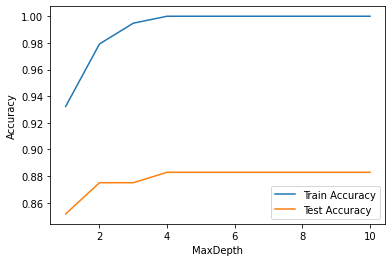

In [ ]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MaxDepth')
plt.legend()

### **모델 파라미터 설정하기 : min_samples_split**

In [ ]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split :
    tree = DecisionTreeClassifier(random_state = 1234,
                                  max_depth = 4,
                                  min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSampleSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [ ]:
df_accuracy_split.round(3)

,MinSampleSplit,TrainAccuracy,TestAccuracy
0,10,0.995,0.875
1,20,0.995,0.875
2,30,0.995,0.875
3,40,0.995,0.875
4,50,0.995,0.875
5,60,0.995,0.875
6,70,0.995,0.875
7,80,0.984,0.867
8,90,0.953,0.844
9,100,0.953,0.844


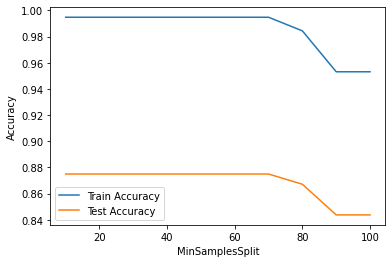

In [ ]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MinSamplesSplit')
plt.legend()

- 분리 노드의 최소 샘플 수가 증가해도 모델의 성능에 변화가 없으며, 80을 넘어서는 순간 모델의 성능이 악화된다.
- TestScore가 0.875이고 TrainScore가 0.995인 **min_samples_split = 10**를 파라미터로 설정한다. 

### **모델 파라미터 설정하기 : min_samples_leaf**

In [ ]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf :
    tree = DecisionTreeClassifier(random_state = 1234,
                                  max_depth = 4,
                                  min_samples_split = 10,
                                  min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSampleLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [ ]:
df_accuracy_leaf.round(3)

,MinSampleLeaf,TrainAccuracy,TestAccuracy
0,2,0.995,0.875
1,4,0.974,0.891
2,6,0.964,0.875
3,8,0.958,0.898
4,10,0.953,0.914
5,12,0.943,0.906
6,14,0.932,0.898
7,16,0.932,0.852
8,18,0.932,0.852
9,20,0.932,0.852


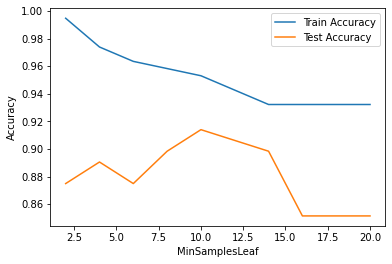

In [ ]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MinSamplesLeaf')
plt.legend()

- 리프 노드의 최소 샘플 수가 증가할수록 모델의 성능이 떨어진다.
- TestScore가 0.914이고 TrainScore가 0.953인 **min_samples_leaf = 10**를 파라미터로 설정한다. 

### **최종 모델 선정**

In [ ]:
tree_final = DecisionTreeClassifier(max_depth = 4,
                                    min_samples_split = 10,
                                    min_samples_leaf = 10,
                                    random_state = 1234)

tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=10,
                       random_state=1234)

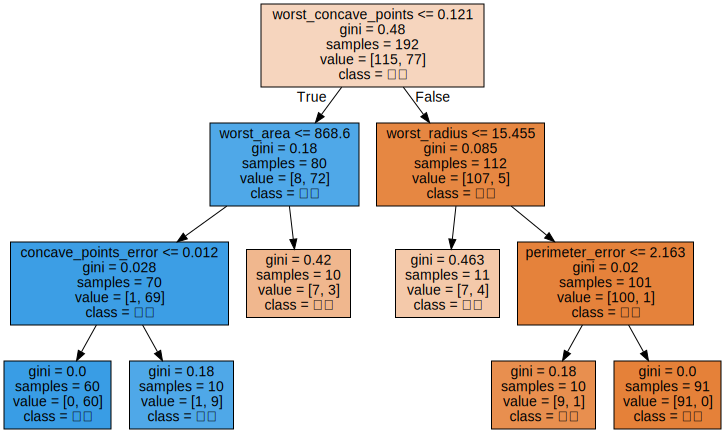

In [ ]:
v_feature_name = df_train_x.columns

export_graphviz(tree_final, out_file = 'tree_final.dot', class_names = ['음성', '양성'],
                feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_final.dot') as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

- 트리 분리에 가장 큰 영향을 주는 변수는 worst_crave_points, worst_area, worst_radius 등이다.
- worst_concave_points <= 0.121 & worst_area <= 868.6 & concave_points_error <= 0.012인 경우 P(Y=양성) = 1
- worst_concave_points > 0.121 & worst_radius > 15.455 & perimeter_error > 2.163 인 경우 P(Y=음성) = 1

### **최종 모델 평가**

In [ ]:
y_pred = tree_final.predict(df_test_x)
print('Accuracy : {0:.3f}'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion Matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy : 0.914
Confusion Matrix : 
[[94  3]
 [ 8 23]]


분류의 정확도는 약 91.4%이며, 모델이 분류기로서의 역할을 잘 수행한다고 할 수 있다.

In [ ]:
print(classification_report(df_test_y, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.922     0.969     0.945        97
           1      0.885     0.742     0.807        31

    accuracy                          0.914       128
   macro avg      0.903     0.856     0.876       128
weighted avg      0.913     0.914     0.911       128



- 1(양성)에 대한 precision이 0.885이다. 양성이라고 예측한 데이터 중 실제 양성에 해당하는 비율이 높으므로 잘 분류되었다고 볼 수 있다.
- 1(양성)에 대한 recall이 0.742이다. 실제 양성 중 양성으로 예측된 비율이 높으므로 잘 분류되었다고 볼 수 있다.
- 1(양성)에 대한 f1 score가 0.807이다. 모델의 전체적인 분류 성능이 좋은 것으로 판단된다.

# **랜덤포레스트 (Random Forest)**

In [52]:
print(df_train_x.shape)
df_train_x.head()

(421, 12)


,PT_THK,PT_WDTH,PT_LTH,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,STEEL_KIND_C,STEEL_KIND_T,HSB_미적용,HSB_적용
95,14.09,3284.0,51234.0,1142.0,75.0,1131.0,122.0,1131.0,1,0,0,1
22,44.39,2040.0,27501.0,1113.0,124.0,1120.0,82.0,1120.0,0,1,0,1
115,18.10,3094.0,41786.0,1159.0,132.0,1164.0,54.0,1164.0,1,0,0,1
116,18.10,3094.0,41786.0,1146.0,108.0,1163.0,88.0,1163.0,1,0,0,1
408,25.23,2616.0,30128.0,1151.0,63.0,1138.0,69.0,1138.0,0,1,0,1


In [53]:
print(df_train_y.shape)
df_train_y.head()

(421,)


95     0
22     0
115    0
116    0
408    0
Name: SCALE, dtype: object

In [55]:
print(df_test_x.shape)
df_test_x.head()

(181, 12)


,PT_THK,PT_WDTH,PT_LTH,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_EXTEMP,STEEL_KIND_C,STEEL_KIND_T,HSB_미적용,HSB_적용
388,18.10,3094.0,41786.0,1195.0,63.0,1173.0,52.0,1173.0,1,0,1,0
659,26.24,2517.0,31959.0,1162.0,79.0,1156.0,69.0,1156.0,1,0,0,1
619,26.24,2583.0,31256.0,1165.0,73.0,1160.0,63.0,1160.0,1,0,0,1
601,18.61,2200.0,43497.0,1150.0,57.0,1160.0,55.0,1160.0,1,0,0,1
369,15.58,3587.0,31410.0,1199.0,67.0,1181.0,56.0,1181.0,1,0,0,1


In [54]:
print(df_test_y.shape)
df_test_y.head()

(181,)


388    1
659    1
619    1
601    0
369    1
Name: SCALE, dtype: object

In [61]:
type(df_raw_y)

pandas.core.series.Series

In [60]:
rf_uncustomized = RandomForestClassifier()
rf_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

ValueError: ignored

만들어진 의사결정나무 모델은 train과 test 데이터에 대해 각각 100%, 98.9%의 설명력을 갖는다. train 데이터에 있어서 과대적합되는 현상이 일어난 것으로 보인다.

### **모델 파라미터 설정하기 : n_estimators**

In [64]:
df_train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 95 to 304
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PT_THK        421 non-null    float64
 1   PT_WDTH       421 non-null    float64
 2   PT_LTH        421 non-null    float64
 3   FUR_HZ_TEMP   421 non-null    float64
 4   FUR_HZ_TIME   421 non-null    float64
 5   FUR_SZ_TEMP   421 non-null    float64
 6   FUR_SZ_TIME   421 non-null    float64
 7   FUR_EXTEMP    421 non-null    float64
 8   STEEL_KIND_C  421 non-null    uint8  
 9   STEEL_KIND_T  421 non-null    uint8  
 10  HSB_미적용       421 non-null    uint8  
 11  HSB_적용        421 non-null    uint8  
dtypes: float64(8), uint8(4)
memory usage: 31.2 KB


In [65]:
df_train_y.info()

AttributeError: ignored

In [62]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree :
    rf = RandomForestClassifier(n_estimators = v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

ValueError: ignored

In [ ]:
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,1.0,0.989
1,20,1.0,0.989
2,30,1.0,0.989
3,40,1.0,0.989
4,50,1.0,0.989
5,60,1.0,0.989
6,70,1.0,0.989
7,80,1.0,0.989
8,90,1.0,0.989
9,100,1.0,0.989


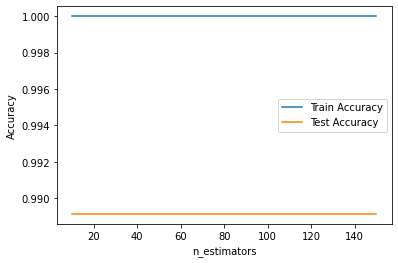

In [ ]:
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('n_estimators')
plt.legend()

- train과 test 데이터에 대해 과대적합이 발생하는 것으로 보인다.
- TestScore가 0.989이고 TrainScore가 1.000인 **n_estimators = 10**를 파라미터로 설정한다. 

### **모델 파라미터 설정하기 : max_depth**

In [ ]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    rf = RandomForestClassifier(random_state = 1234,
                                  n_estimators = 10,
                                  max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainScore'] = train_accuracy
df_accuracy_depth['TestScore'] = test_accuracy

In [ ]:
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.949,0.978
1,2,0.978,0.978
2,3,0.986,0.989
3,4,0.993,0.989
4,5,1.000,0.989
5,6,1.000,0.989
6,7,1.000,0.989
7,8,1.000,0.989
8,9,1.000,0.989
9,10,1.000,0.989


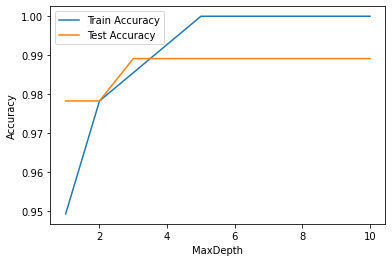

In [ ]:
plt.plot(para_depth, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MaxDepth')
plt.legend()

- 모델의 최대 깊이가 증가하면서 train 데이터에 대해 모델의 성능이 향상된다.
- test 데이터에 대해서는 모델의 성능이 감소하였다가 증가한 후 상태를 유지한다.
- TestScore가 0.989이고 TrainScore가 0.986인 **max_depth = 3**를 파라미터로 설정한다. 

### **모델 파라미터 설정하기 : min_samples_split**

In [ ]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split :
    rf = RandomForestClassifier(random_state = 1234,
                                n_estimators = 10,
                                max_depth = 3,
                                min_samples_split = v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSampleSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [ ]:
df_accuracy_split.round(3)

,MinSampleSplit,TrainAccuracy,TestAccuracy
0,10,0.986,0.989
1,20,0.978,0.978
2,30,0.978,0.978
3,40,0.964,0.978
4,50,0.942,0.967
5,60,0.949,0.978
6,70,0.949,0.978
7,80,0.949,0.978
8,90,0.913,0.924
9,100,0.522,0.467


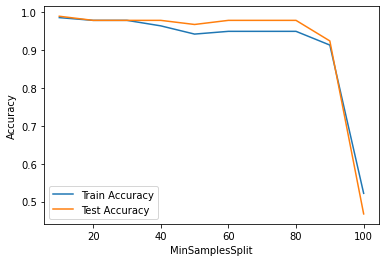

In [ ]:
plt.plot(para_split, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MinSamplesSplit')
plt.legend()

- 분리 노드의 최소 샘플 수가 증가할수록 모델의 성능에 변화가 없다가 80에서 급격하게 감소한다.
- TestScore가 0.989이고 TrainScore가 0.986인 **min_samples_split = 10**를 파라미터로 설정한다. 

### **모델 파라미터 설정하기 : min_samples_leaf**

In [ ]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf :
    rf = RandomForestClassifier(random_state = 1234,
                                n_estimators = 10,
                                max_depth = 3,
                                min_samples_split = 10,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSampleLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [ ]:
df_accuracy_leaf.round(3)

,MinSampleLeaf,TrainAccuracy,TestAccuracy
0,10,0.957,0.978
1,20,0.957,0.978
2,30,0.949,0.978
3,40,0.935,0.978
4,50,0.522,0.467
5,60,0.522,0.467
6,70,0.522,0.467
7,80,0.522,0.467
8,90,0.522,0.467
9,100,0.522,0.467


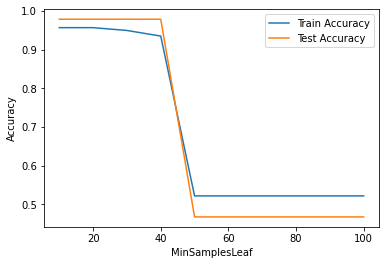

In [ ]:
plt.plot(para_leaf, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('MinSamplesLeaf')
plt.legend()

- 리프 노드의 최소 샘플 수가 증가할수록 모델 성능에 변화가 없다가, 60이 되면서 모델 성능이 급격하게 떨어진다.
- TestScore가 0.978이고 TrainScore가 0.935인 **min_samples_leaf = 40**를 파라미터로 설정한다. 

## **최종 모델 선정 및 모델 평가**

In [ ]:
rf_final = RandomForestClassifier(n_estimators = 10,
                                  max_depth = 3,
                                  min_samples_split = 10,
                                  min_samples_leaf = 40,
                                  random_state = 1234)

rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=3, min_samples_leaf=40, min_samples_split=10,
                       n_estimators=10, random_state=1234)

In [ ]:
y_pred = rf_final.predict(df_test_x)
print('Accuracy : {0:.3f}'.format(rf_final.score(df_test_x, df_test_y)))
print('Confusion Matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy : 0.978
Confusion Matrix : 
[[49  0]
 [ 2 41]]


해당 모델은 약 97.8%의 정확도를 보여준다.

In [ ]:
print(classification_report(df_test_y, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.961     1.000     0.980        49
           1      1.000     0.953     0.976        43

    accuracy                          0.978        92
   macro avg      0.980     0.977     0.978        92
weighted avg      0.979     0.978     0.978        92



- 1에 대한 precision이 각각 0.676이다. 양성이라고 예측한 데이터 중 실제 양성에 해당하는 비율이 다소 낮은 것으로 파악된다.
- 1에 대한 recall이 각각 0.742이다. 실제 양성 중 양성으로 분류된 데이터의 개수가 양호한 것으로 보인다.
- 1에 대한 f1 score가 각각 0.708이다. 모델의 전체적인 분류 성능이 양호한 것으로 해석된다.